# Project 4：以 apriori 分析 91APP 訂單

### Part 1: EDA

1.1 匯入資料

1.2 檢視資料

### Part 2: Data Preprocessing

2.1 資料預處理：groupby

2.2 資料預處理：One Hot Encode

### Part 3: Association Rules

3.1 建立關聯規則：apriori

    3.1.1 設定 confidence

    3.1.2 設定 lift
    
    3.1.3 多重設定

--------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Part 1: EDA

## 1.1 匯入資料

In [2]:
df_orders = pd.read_csv('./data/Orders.csv')

C:\Users\jestw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1.2 檢視資料

In [3]:
print(df_orders.columns)

Index(['DateId', 'MemberId', 'OrderGroupCode', 'TrackSourceTypeDef',
       'TrackDeviceTypeDef', 'PayProfileTypeDef', 'SalesOrderSlaveId',
       'SalePageId', 'IsMajor', 'IsGift', 'IsSalePageGift', 'Quantity',
       'UnitPrice', 'PromotionDiscount', 'ECouponId', 'ECouponDiscount',
       'SalesOrderSlaveTotalPayment', 'SalesOrderSlaveDateTime',
       'SalesOrderReceiverId', 'City', 'District', 'ZipCode', 'StoreName',
       'StoreId', 'DeliverTypeDef', 'StatusDef', 'ReturnGoodsDateId',
       'CauseDef'],
      dtype='object')


In [4]:
df_orders.head(3)

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN


In [5]:
df_orders ['UnitPrice'].describe()

count    5.495276e+06
mean     2.630405e+02
std      1.247388e+02
min      0.000000e+00
25%      1.990000e+02
50%      2.370000e+02
75%      3.200000e+02
max      3.500000e+03
Name: UnitPrice, dtype: float64

# Part 2: Data Preprocessing

## 2.1 資料預處理：groupby

按照商品單價（Unit Price）的數值分布，以每100元作為一區間，分為四個品項價格區間，將商品分類。

In [6]:
bin = [0,100,200,300,400]

In [7]:
category = pd.cut(df_orders ['UnitPrice'],bin)
category = category.to_frame()
category.columns = ['UnitPriceRange']
df_orders_new = pd.concat([df_orders,category],axis = 1)
df_orders_new.head()

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,UnitPriceRange
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,"(300, 400]"
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,"(100, 200]"
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,"(100, 200]"
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,"(200, 300]"
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,"(0, 100]"


以長條圖呈現「商品數 vs 單價」的分布，發現多數品項單價介於100-200元間，其次是200-300元間。

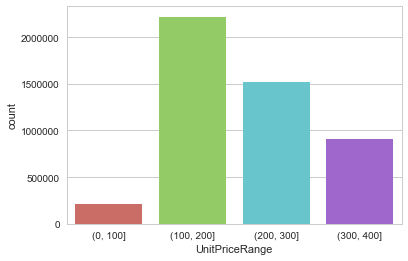

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
 
#draw bar plot
sns.countplot(x = 'UnitPriceRange', data = df_orders_new, palette = 'hls')
plt.show()

In [9]:
df_new = df_orders_new[['OrderGroupCode','UnitPriceRange','Quantity']]
df_new.head()

,OrderGroupCode,UnitPriceRange,Quantity
0,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,"(300, 400]",1
1,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,"(100, 200]",1
2,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,"(100, 200]",1
3,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,"(200, 300]",1
4,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...","(0, 100]",1


In [10]:
df_new_sum = df_new.groupby(by=['OrderGroupCode','UnitPriceRange'])['Quantity'].sum()
df_new_sum.head()

OrderGroupCode                                            UnitPriceRange
b"  y!'[+Jr\xd6\xd2D@\x1e\xee\x17lm\xca\xda"              (100, 200]        3
                                                          (200, 300]        1
b" #\xa6'/\x82\xe7`\xb6\xb6\xfd\xa9p\x9cIr\x11\x7fr\x12"  (100, 200]        2
                                                          (300, 400]        1
b" $\x9f\x86M@m'\xaf\x90Z\x9f\x10Eko \xeb\xa7\xc3"        (0, 100]          1
Name: Quantity, dtype: int64

## 2.2 資料預處理：One Hot Encode

In [11]:
df_new_one_hot = df_new_sum.unstack().fillna(0).applymap(lambda x: 1 if x>0 else 0)
df_new_one_hot.head()

UnitPriceRange,"(0, 100]","(100, 200]","(200, 300]","(300, 400]"
OrderGroupCode,,,,
"b"" y!'[+Jr\xd6\xd2D@\x1e\xee\x17lm\xca\xda""",0,1,1,0
"b"" #\xa6'/\x82\xe7`\xb6\xb6\xfd\xa9p\x9cIr\x11\x7fr\x12""",0,1,0,1
"b"" $\x9f\x86M@m'\xaf\x90Z\x9f\x10Eko \xeb\xa7\xc3""",1,1,1,0
"b"" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\xc3+""",0,1,0,0
"b"" $\xfd3\x83e\x8a\x0b'W/\x9f\xee\xdb^ \xe2\xcex}""",0,0,1,0


# Part 3: Association Rules

## 3.1 建立關聯規則：apriori

透過 `apriori` 首先計算每個品項價格區間購買的支持度，其中「單價介於100-200元間」及「單價介於200-300元間」的品項，機率皆高於50%。

In [12]:
frequent_itemsets = apriori(df_new_one_hot, min_support=0.1, use_colnames=True)
frequent_itemsets.sort_values(by = 'support',ascending=False)

,support,itemsets
1,0.705907,"[(100, 200]]"
2,0.620484,"[(200, 300]]"
3,0.471571,"[(300, 400]]"
4,0.418076,"[(100, 200], (200, 300]]"
5,0.290865,"[(100, 200], (300, 400]]"
6,0.269727,"[(200, 300], (300, 400]]"
7,0.173749,"[(100, 200], (200, 300], (300, 400]]"
0,0.106272,"[(0, 100]]"


透過 `association_rules()` 設定 (1) 關心的指標 (metrics) 以及 (2) 指標的閾值 (threshold)。以下將分別設定指標信賴度 (confidence) 和增益 (lift)。

### 3.1.1 設定 confidence

Confidence(A→B) 表示在購買A的情況下，也買B的條件機率。假設今天只對信賴度高於70%的交易感興趣，將 minthreshold 設為 0.7，得出以下商品單價組合。從下表得知，在購買下列 antecedants 商品單價組合的情況下，也購買「單價介於100-200元間」品項的機率高達七成以上。

In [13]:
frequent_itemsets = apriori(df_new_one_hot, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules.sort_values(by = 'confidence',ascending=False)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"((0, 100], (200, 300])","((100, 200])",0.063482,0.705907,0.048178,0.758926,1.075108,0.003366,1.219930
0,"((0, 100])","((100, 200])",0.106272,0.705907,0.079240,0.745630,1.056273,0.004221,1.156164
3,"((300, 400], (200, 300], (0, 100])","((100, 200])",0.025079,0.705907,0.018602,0.741764,1.050795,0.000899,1.138851
2,"((300, 400], (0, 100])","((100, 200])",0.040970,0.705907,0.029722,0.725441,1.027672,0.000800,1.071147


### 3.1.2 設定 lift

Lift(A→B) < 1 表示A的出現與B的出現是負相關； > 1表示A的出現與B的出現是正相關。假設今天只對增益高於1.05的交易感興趣，將 minthreshold 設為 1.05，得出以下商品單價組合。從下表得知，下列 consequents 商品單價組合若搭配相對應的 antecedants 銷售，比單獨只銷售來的效果好。

In [14]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.05)
rules.sort_values(by = 'lift',ascending=False)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"((100, 200], (200, 300])","((300, 400], (0, 100])",0.418076,0.040970,0.018602,0.044496,1.086042,0.001474,1.003689
8,"((300, 400], (0, 100])","((100, 200], (200, 300])",0.040970,0.418076,0.018602,0.454047,1.086042,0.001474,1.065888
2,"((100, 200], (200, 300])","((0, 100])",0.418076,0.106272,0.048178,0.115238,1.084362,0.003748,1.010133
5,"((0, 100])","((100, 200], (200, 300])",0.106272,0.418076,0.048178,0.453345,1.084362,0.003748,1.064519
3,"((0, 100], (200, 300])","((100, 200])",0.063482,0.705907,0.048178,0.758926,1.075108,0.003366,1.219930
4,"((100, 200])","((0, 100], (200, 300])",0.705907,0.063482,0.048178,0.068250,1.075108,0.003366,1.005117
0,"((100, 200])","((0, 100])",0.705907,0.106272,0.079240,0.112253,1.056273,0.004221,1.006736
1,"((0, 100])","((100, 200])",0.106272,0.705907,0.079240,0.745630,1.056273,0.004221,1.156164
6,"((300, 400], (200, 300], (0, 100])","((100, 200])",0.025079,0.705907,0.018602,0.741764,1.050795,0.000899,1.138851
9,"((100, 200])","((300, 400], (200, 300], (0, 100])",0.705907,0.025079,0.018602,0.026353,1.050795,0.000899,1.001308


### 3.1.3 多重設定

假設今天同時設定多重指標:

+ a confidence > 0.70
+ a lift score > 1.05
+ at least 2 antecedants

首先計算 antecedent length :

In [15]:
rules["antecedant_len"] = rules["antecedants"].apply(lambda x: len(x))
rules

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,"((100, 200])","((0, 100])",0.705907,0.106272,0.079240,0.112253,1.056273,0.004221,1.006736,1
1,"((0, 100])","((100, 200])",0.106272,0.705907,0.079240,0.745630,1.056273,0.004221,1.156164,1
2,"((100, 200], (200, 300])","((0, 100])",0.418076,0.106272,0.048178,0.115238,1.084362,0.003748,1.010133,2
3,"((0, 100], (200, 300])","((100, 200])",0.063482,0.705907,0.048178,0.758926,1.075108,0.003366,1.219930,2
4,"((100, 200])","((0, 100], (200, 300])",0.705907,0.063482,0.048178,0.068250,1.075108,0.003366,1.005117,1
5,"((0, 100])","((100, 200], (200, 300])",0.106272,0.418076,0.048178,0.453345,1.084362,0.003748,1.064519,1
6,"((300, 400], (200, 300], (0, 100])","((100, 200])",0.025079,0.705907,0.018602,0.741764,1.050795,0.000899,1.138851,3
7,"((100, 200], (200, 300])","((300, 400], (0, 100])",0.418076,0.040970,0.018602,0.044496,1.086042,0.001474,1.003689,2
8,"((300, 400], (0, 100])","((100, 200], (200, 300])",0.040970,0.418076,0.018602,0.454047,1.086042,0.001474,1.065888,2
9,"((100, 200])","((300, 400], (200, 300], (0, 100])",0.705907,0.025079,0.018602,0.026353,1.050795,0.000899,1.001308,1


從下表得知，在購買下列 antecedants 商品單價組合的情況下，也購買「單價介於100-200元間」的品項將能符合以上所有條件。

In [16]:
rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.70) &
       (rules['lift'] > 1.05) ]

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
3,"((0, 100], (200, 300])","((100, 200])",0.063482,0.705907,0.048178,0.758926,1.075108,0.003366,1.219930,2
6,"((300, 400], (200, 300], (0, 100])","((100, 200])",0.025079,0.705907,0.018602,0.741764,1.050795,0.000899,1.138851,3
